# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# Import your libraries
from scipy import stats
import numpy as np



# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [3]:
np.random.seed(28041990)
mean = 50
sd = 5
samples = [10, 50, 500, 5000]

distribs = [np.random.normal(loc=mean, scale=sd, size =e) for e in samples]

list(map(stats.normaltest, distribs))



/home/edu/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


[NormaltestResult(statistic=3.145636390020345, pvalue=0.20745969585728283),
 NormaltestResult(statistic=4.679875784397929, pvalue=0.09633362111407238),
 NormaltestResult(statistic=1.0890650585623929, pvalue=0.5801129057610558),
 NormaltestResult(statistic=0.8838935145608009, pvalue=0.6427838581051899)]

#### Interpret the normaltest results and make your observations.

In [4]:
# So according to the documentation, what the normaltest functon tests is the null hypothesis that the sample is normally distributed, and gives a probablity of this being the case.
# So in we can interpret the p-value as the probability that the sample is normally distributed. Obivously, larger samples are going to be more likely to be normally distributed.



#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

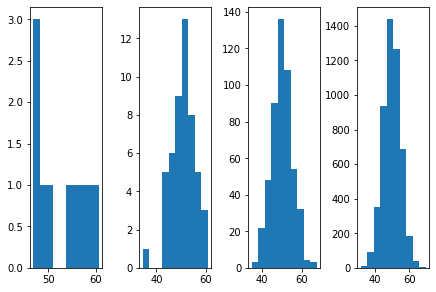

In [7]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,4)
for i,e in enumerate(distribs):
    ax[i].hist(e)

fig.tight_layout(pad=0.5)


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

As the sample size increases, the distribution become more normal-like. Which matches with the CLT, that says that as you have more samples/larger samples, you approach the population mean more closely. In this case, we know that the population has normal distribution and a mean of 50, because we used a function that created a normally distributed population to draw from.


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

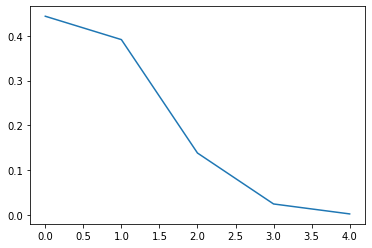

In [32]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1)
'''
n, p = 5, 0.15

x = np.arange(binom.ppf(0.01, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
'''
n, p = 5, 0.15
# x = range(1,n+1)
x = range(5)
fun_binom = binom(n,p)

plt.plot(fun_binom.pmf(x))



#### Explain what you observe from the plot above

In [ ]:
# The curve gives the probability on the y-axis that at least x people (starting from 0) have clicked on an ad. 
# So if the probability that each individual clicks is 0.15, the probability that at least one person clicks is over 40%

#### Now plot PMF with 50, 500, and 5000 visitors.

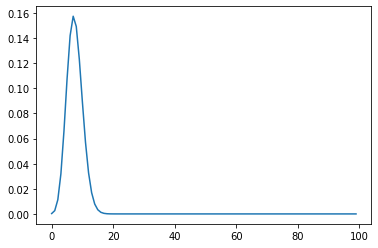

In [39]:
n, p = 50, 0.15
x = range(0,100)
plt.plot(binom(n,p).pmf(x))

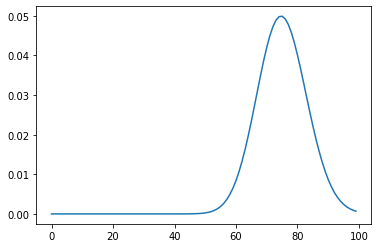

In [40]:
n, p = 500, 0.15
x = range(0,100)
plt.plot(binom(n,p).pmf(x))

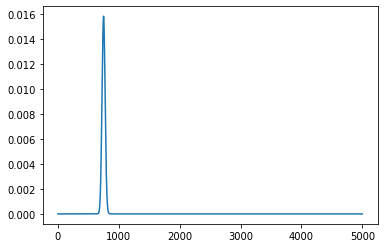

In [43]:
n, p = 5000, 0.15
x = range(0,n)
plt.plot(binom(n,p).pmf(x))

#### What did you notice from the distribution plots? Comment your findings.

In [44]:
# The distribution moves right as the population increases, which makes sense. 
# You are more likely to have more succeses as more people take attempts.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [47]:
from scipy.stats import poisson
data_poisson = poisson.pmf(300,320)
data_poisson

0.01216063471394124

#### What is the probability of getting 60 visits?

In [48]:
mu = 300
k = 60
poisson.pmf(mu,k)

7.97816763099837e-108

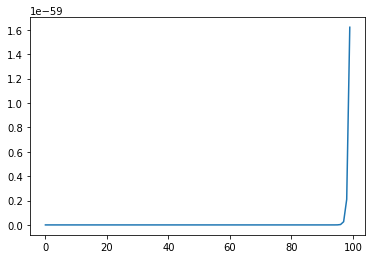

In [53]:
mu = 300
k = range(100)
poisson.pmf(mu,k)
plt.plot(poisson.pmf(mu,k));

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [49]:
mu = 300
k = range(1001)
data = poisson.pmf(mu,k)

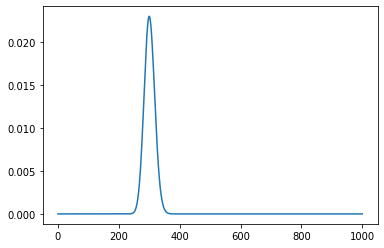

In [51]:
plt.plot(data)